## Recreating Analysis of Piao Nature 2008

### Step 5: get tmp-co2 correlations and trends in ccgcrv outputs

In [15]:
import pandas as pd
from piao2008_get_ccgcrv import get_ccgcrv
from piao2008_get_tmp_mean import get_tmp_mean
from matplotlib import pyplot as plt
import numpy as np

In [5]:
# Prepare variables
co2_file = '../data/piao_2008/piao_co2_fm.csv'
stations_file = '../data/piao_2008/piao_stations.csv'
start_col = 'start_piao2008'
end_col = 'end_piao2008'
stations = pd.read_csv(stations_file)

In [3]:
# Get ccgcrv output
ccg_output, ccgmeans = get_ccgcrv(co2_file=co2_file, stations_file=stations_file, start_col=start_col, end_col=end_col)


In [ ]:
# Get temperature data
tmp_mean = get_tmp_mean(tmp_file='/Users/moyanofe/BigData/GeoSpatial/Climate/CRU-TS_4.05_1901-2020/cru_ts4.05.1901.2020.tmp.dat.nc',
    limS=30,
    limN=80)

In [23]:
# Get anomalies

station = 'BRW'
year_beg = int(stations.loc[stations['name']==station, start_col])
year_end = int(stations.loc[stations['name']==station, end_col])

tmp = tmp_mean.loc[year_beg:year_end,'tmp_SON']
tmp_ano = tmp - tmp.mean()

azc = ccg_output[station]['yearly']['tcu_doy']
azc_ano = azc - azc.mean()

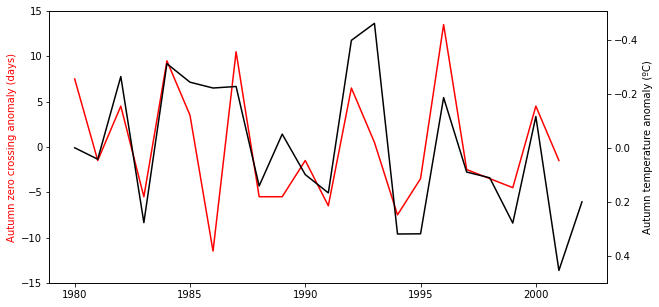

In [45]:
# Plot anomalies

plt.rcParams['figure.figsize'] = [10, 5]
years = np.arange(year_beg, (year_end+1))

# Plot autumn zero crossing (AZC)
fig,ax=plt.subplots()
ax.plot(years[:-1], azc_ano, '-', color='red', label='AZC anomaly')
ax.set_ylabel("Autumn zero crossing anomaly (days)", color="red")
ax.set_ylim([-15, 15])
ax2=ax.twinx()
ax2.plot(years, tmp_ano, '-', color='black', label='Autumn temperature anomaly')
ax2.set_ylabel("Autumn temperature anomaly (ºC)")
# ax2.set_ylim([-2, 2])
ax2.invert_yaxis()
plt.show()

# save the plot as a file
fig.savefig('../plots/' + station + '_azc-tmp.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')